In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_table('./df_cl',sep =',',low_memory=False)

In [3]:
df.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,133.28


In [4]:
states = { 2: 'Alaska', 1: 'Alabama', 5: 'Arkansas', 4:'Arizona', 6:'California', 8:'Colorado',
           9: 'Connecticut', 11: 'District of Columbia', 10: 'Delaware', 12: 'Florida', 13:'Georgia',
           15: 'Hawaii', 19: 'Iowa', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 20: 'Kansas', 21:'Kentucky',
           22: 'Louisiana', 25: 'Massachusetts', 24: 'Maryland', 23: 'Maine', 26: 'Michigan',
           27: 'Minnesota', 29: 'Missouri', 28: 'Mississippi', 30: 'Montana', 37: 'North Carolina',
           38: 'North Dakota', 31: 'Nebraska', 32:'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
           32: 'Nevada', 36: 'New York', 39: 'Ohio', 40: 'Oklahoma', 41:'Oregon', 42: 'Pennsylvania',
           72: 'Puerto Rico' , 44:'Rhode Island' , 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
           49: 'Utah', 51: 'Virginia', 50: 'Vermont', 53: 'Washington', 55:'Wisconsin', 54: 'West Virginia',66:'Guam',
           56: 'Wyoming'}

In [5]:
df['STATE_CODE_001'].replace(states, inplace = True)
dummies = pd.get_dummies(df['STATE_CODE_001'],drop_first=True)
dummies.head(2)

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_dummies = pd.concat([df, dummies.reindex(df.index)], axis=1)
df_dummies.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Material = { 2:'Concrete continuous', 1:'Concret', 3:'Steel', 4:'Steel continous', 5:'Prestressed concret',
          6:'Prestressed concret continous', 7:'Wood or Timber' ,8:'Masonary',9:'Almunuim',0:'Other'
           }
df['STRUCTURE_KIND_043A'].replace(Material, inplace = True)
df_type = pd.get_dummies(df['STRUCTURE_KIND_043A'],drop_first=True)
df_reg = pd.concat([df_dummies, df_type .reindex(df.index)], axis=1)
df_reg.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,Wyoming,Concret,Concrete continuous,Masonary,Other,Prestressed concret,Prestressed concret continous,Steel,Steel continous,Wood or Timber
0,Alabama,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,Alabama,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
numeric = df_reg.select_dtypes(exclude ='object')
X = numeric.drop('TOTAL_IMP_COST_096', axis = 1)
y = numeric['TOTAL_IMP_COST_096'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state = 42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=10)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 5 components): {np.round(var_exp[:10],2)}')

Explained variance (first 5 components): [0.06 0.04 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.01]


In [13]:
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:10],3)}')

Cumulative explained variance (first 20 components): [0.064 0.104 0.133 0.158 0.18  0.199 0.218 0.235 0.251 0.266]


In [14]:
zsub = pca.transform(X)
df_Zsub = pd.DataFrame(zsub)

In [15]:
df_Zsub

,0,1,2,3,4,5,6,7,8,9
0,-1.335381e+06,-1.934073e+06,-1.494731e+06,-1.082835e+07,-5.443735e+06,3.809128e+07,-6.744779e+06,2.534770e+07,9.169108e+06,-8.280341e+06
1,-1.335176e+06,-1.933761e+06,-1.494108e+06,-1.082822e+07,-5.444292e+06,3.809120e+07,-6.744004e+06,2.534758e+07,9.169605e+06,-8.280560e+06
2,-1.306741e+06,-1.759739e+06,-1.084164e+06,-1.078114e+07,-5.827892e+06,3.707254e+07,-6.242940e+06,2.485439e+07,8.831710e+06,-7.825621e+06
3,-1.350678e+06,-1.740802e+06,-8.988039e+05,-1.130643e+07,-6.343577e+06,3.834439e+07,-6.253035e+06,2.581677e+07,9.092304e+06,-7.950054e+06
4,-1.355346e+06,-1.748827e+06,-9.096332e+05,-1.131690e+07,-6.340475e+06,3.840410e+07,-6.274540e+06,2.585353e+07,9.103044e+06,-7.968066e+06
...,...,...,...,...,...,...,...,...,...,...
280369,-9.726982e+05,-1.746130e+06,-2.044974e+06,-7.439774e+06,-2.711359e+06,2.834459e+07,-5.824412e+06,1.839118e+07,7.066041e+06,-6.758705e+06
280370,-9.847106e+05,-1.784745e+06,-2.115823e+06,-7.521064e+06,-2.691918e+06,2.877534e+07,-5.944857e+06,1.864662e+07,7.190929e+06,-6.893928e+06
280371,-9.711353e+05,-1.766923e+06,-2.098783e+06,-7.444966e+06,-2.661324e+06,2.852159e+07,-5.890085e+06,1.847551e+07,7.139324e+06,-6.843490e+06
280372,-9.721416e+05,-1.749028e+06,-2.053060e+06,-7.437505e+06,-2.701685e+06,2.836757e+07,-5.832907e+06,1.839984e+07,7.078779e+06,-6.773734e+06


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
X1 = df_Zsub
y1 = numeric['TOTAL_IMP_COST_096'].astype(int)

In [18]:
X_train , X_test , y_train , y_test = train_test_split( X1,y1,test_size=0.2,random_state = 42)

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)
cross_val_score(lr,X_train, y_train).mean()

0.8503824732130287

In [20]:
cross_val_score(lr,X_test, y_test).mean()

0.8591473838320347

In [21]:
y_test.shape

(56075,)

In [22]:
y_test1 = np.array(y_test)

In [23]:
y_test1.mean()

4960.566580472581

In [24]:
predict = lr.predict(X_test)

In [25]:
f = pd.DataFrame(predict)

In [26]:
residual = y_test - predict

In [27]:
residual.mean() 

-107.51934743166642

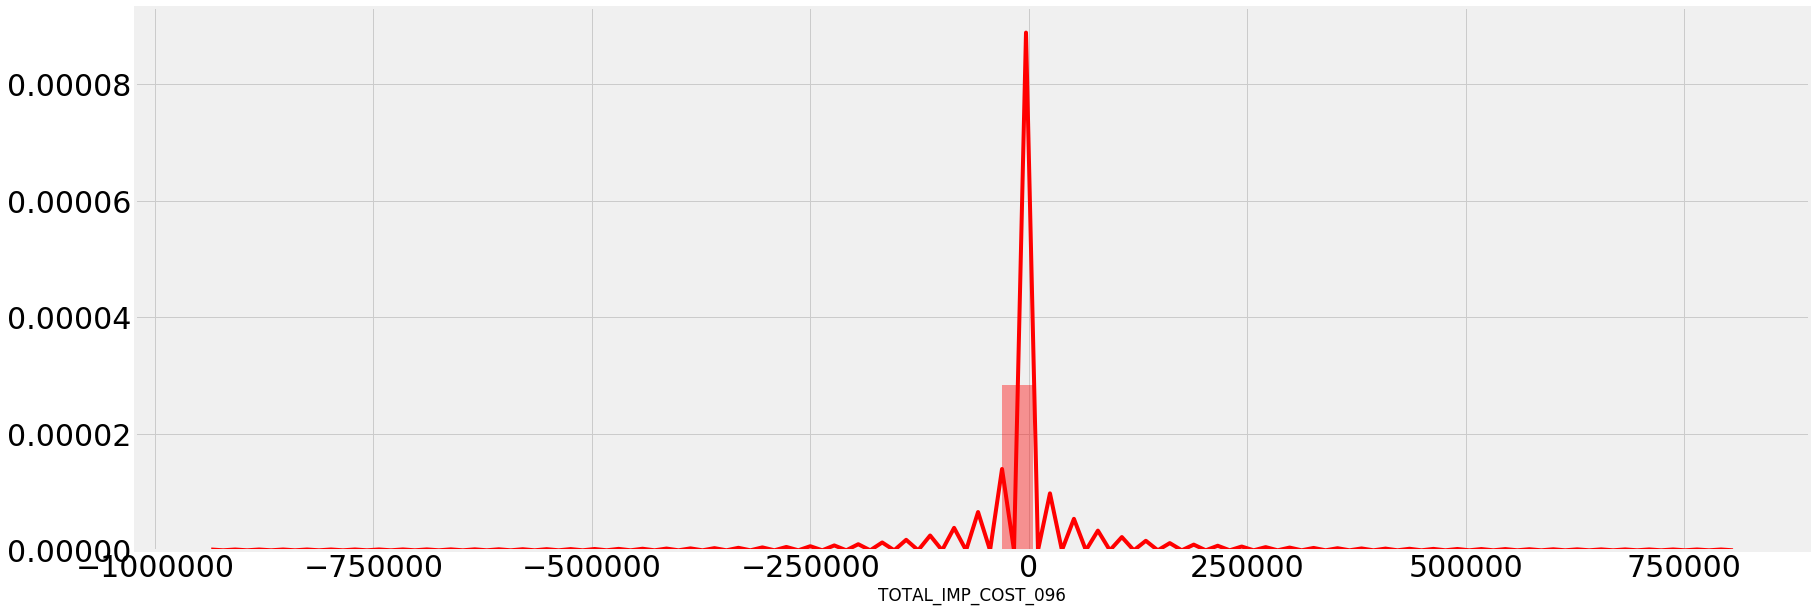

In [28]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.distplot(residual,color='r')  
plt.savefig('residual')

In [29]:
 predict.mean()

5068.085927904195